<a href="https://colab.research.google.com/github/ridwibra/Noise-Remover-Autoencoder/blob/main/MNIST_Cleaning_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


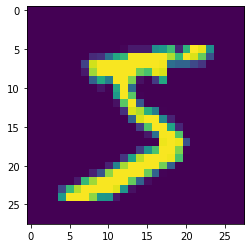

In [3]:
plt.imshow(X_train[0])

In [4]:
X_train = X_train/255

In [5]:
X_test = X_test/255

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, GaussianNoise
from tensorflow.keras.optimizers import SGD

In [7]:
X_train[0].shape

(28, 28)

In [8]:
28*28

784

In [9]:
noise = GaussianNoise(0.2)

In [10]:
noisey = noise(X_test[:10], training = True)

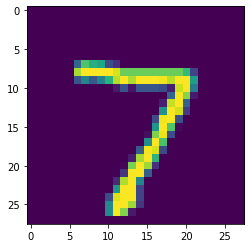

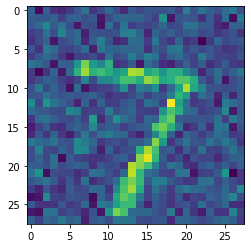

In [11]:
n = 0
plt.imshow(X_test[n])
plt.show()
plt.imshow(noisey[n])

In [12]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [13]:
decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(28*28, activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [14]:
autoencoder = Sequential([encoder, decoder])

In [15]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
autoencoder.fit(X_train, X_train, epochs=30, validation_data=[X_test, X_test])

Epoch 1/30
1875/1875 [==============================] - 16s 7ms/step - loss: 0.1722 - accuracy: 0.1795 - val_loss: 0.1347 - val_accuracy: 0.2183
Epoch 2/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1304 - accuracy: 0.2292 - val_loss: 0.1199 - val_accuracy: 0.2375
Epoch 3/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1214 - accuracy: 0.2444 - val_loss: 0.1157 - val_accuracy: 0.2463
Epoch 4/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1170 - accuracy: 0.2526 - val_loss: 0.1114 - val_accuracy: 0.2606
Epoch 5/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1128 - accuracy: 0.2604 - val_loss: 0.1069 - val_accuracy: 0.2623
Epoch 6/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1095 - accuracy: 0.2660 - val_loss: 0.1051 - val_accuracy: 0.2628
Epoch 7/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1070 - accuracy: 0.2699 - val_loss: 0.1032 - val_ac

In [17]:
ten_noisey_images = noise(X_test[:10], training=True)

In [18]:
denoised = autoencoder(ten_noisey_images)

original image


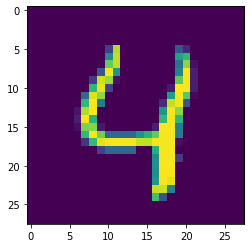

image after noise was added


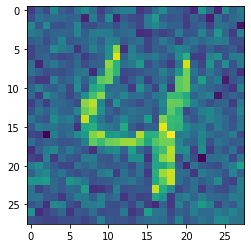

image after noise was removed


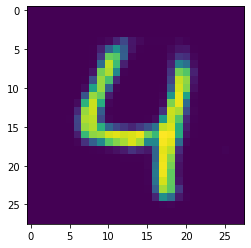

In [25]:
n = 4
print("original image")
plt.imshow(X_test[n])
plt.show()
print("image after noise was added")
plt.imshow(ten_noisey_images[n])
plt.show()
print("image after noise was removed")
plt.imshow(denoised[n])
plt.show()